In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from astroML.classification import GMMBayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix
from astroML.utils import split_samples, completeness_contamination
import corner
import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv("../solutions/galaxyquasar.csv")
data

,u,g,r,i,z,class,z1,zerr
0,18.97213,18.53676,18.58280,18.34936,18.29215,QSO,0.522819,0.000155
1,19.24592,17.47646,16.47817,16.04472,15.68851,GALAXY,0.122846,0.000028
2,19.43536,17.70268,16.91565,16.58327,16.39128,GALAXY,0.000000,0.000000
3,19.31626,18.18312,17.39591,16.94549,16.65395,GALAXY,0.147435,0.000009
4,19.28828,19.11188,18.88937,18.80013,18.49183,QSO,2.011455,0.000631
...,...,...,...,...,...,...,...,...
49995,19.37295,18.12382,17.39886,16.98503,16.70585,GALAXY,0.113016,0.000011
49996,18.52021,16.88262,16.03280,15.56884,15.22454,GALAXY,0.085063,0.000014
49997,18.62718,17.30876,16.87371,16.62399,16.42296,GALAXY,0.054429,0.000008
49998,19.55140,18.27711,17.62101,17.21947,17.03347,GALAXY,0.112571,0.000009


In [11]:
u_g = np.array(data['u'] - data['g'])
g_r = np.array(data['g'] - data['r'])
r_i = np.array(data['r'] - data['i'])
i_z = np.array(data['i'] - data['z'])

In [5]:
le = LabelEncoder()

#Assign unique integers: 1 QSO, 0 galaxy
df['class'] = le.fit_transform(df['class']) 
label_class = le.inverse_transform(df['class'])
class_name = le.classes_
print('Class names: ', class_name)
print('Labels: ', label_class)

Class names:  ['GALAXY' 'QSO']
Labels:  ['QSO' 'GALAXY' 'GALAXY' ... 'GALAXY' 'GALAXY' 'GALAXY']


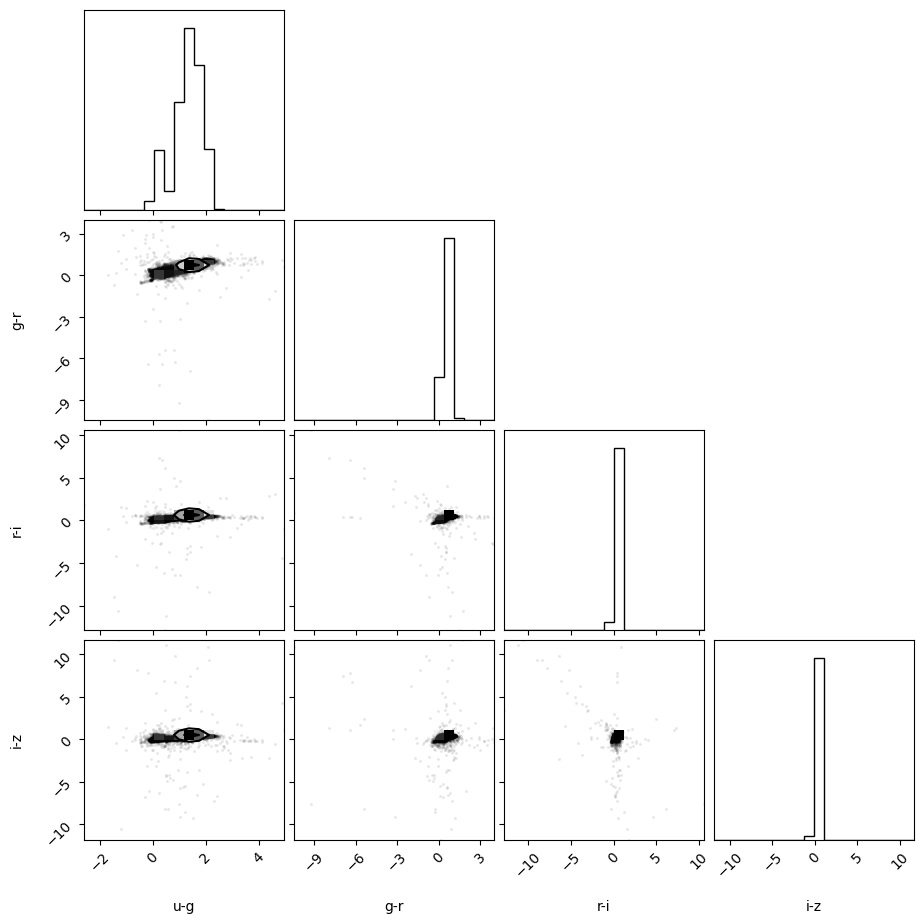

In [16]:
corner.corner(np.array([u_g, g_r, r_i, i_z]).T, labels=['u-g', 'g-r', 'r-i', 'i-z']);

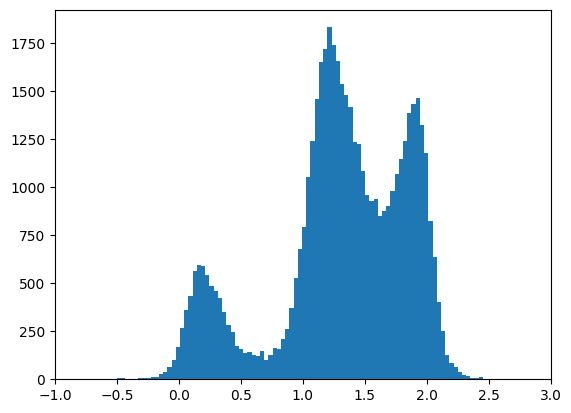

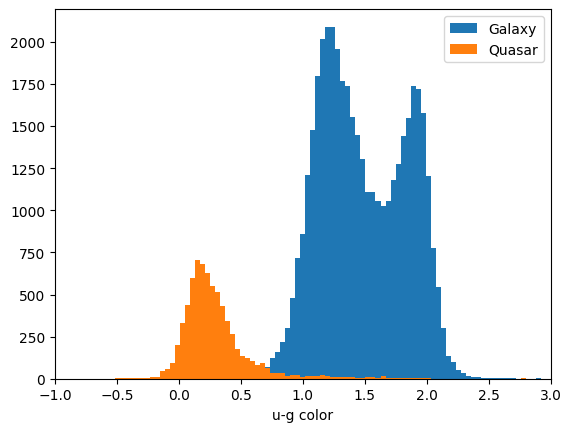

In [31]:
plt.hist(u_g, bins = int(np.sqrt(len(u_g))))
plt.xlim(-1,3)
plt.show()
plt.hist(u_g[data['class'] == 'GALAXY'], bins = np.linspace(-1,3,100), label = 'Galaxy')
plt.hist(u_g[data['class'] == 'QSO'], bins = np.linspace(-1,3,100), label = 'Quasar')
plt.legend()
plt.xlim(-1,3)
plt.xlabel('u-g color')
plt.show()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(u_g.reshape(-1,1), data['class'], test_size=0.3, random_state=42)

clf = GaussianNB()

for i in range(4):

    clf.fit(X_train[:,0:i+1] ,y_train )

    y_prob = clf.predict_proba(X_test[:,0:i+1]) [:,1] 
    
    
    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=str(i+1))
plt.legend()